# Analaysis

In [1]:
%matplotlib inline

In [2]:
# Third-party libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_theme()

In [3]:
data = pd.read_csv('all_courses.csv')
data.head()

,name,address,state,zip,phone,url
0,Anchorage Golf Course,"3651 OMalley Rd Anchorage, AK 99516",AK,99516.0,907-522-3363,https://www.golfalaska.com/golfcourses/anchora...
1,Bear Valley Golf Course,"2 8 Mile Anton Larson Bay Rd Kodiak, AK 99615",AK,99615.0,414617180,https://www.golfalaska.com/golfcourses/bear-va...
2,Birch Ridge Golf Course,"42223 Sterling Hwy Soldotna, AK 99669",AK,99669.0,907-262-5270,https://www.golfalaska.com/golfcourses/birch-r...
3,Black Diamond Golf Course,"Mile 247 George Park Hwy Otto Lake Rd Healy, A...",AK,99743.0,907-683-4653,https://www.golfalaska.com/golfcourses/black-d...
4,Chena Bend Golf Course,"Bldg 2092 AFVR-FW-PAD Fort Wainwright, AK 99703",AK,99703.0,907-353-6223,https://www.golfalaska.com/golfcourses/chena-b...


In [4]:
states = pd.read_csv('state_populations.csv')
states = states.set_index('code')
counts = data.groupby('state').size()
states['courses'] = counts
states = states.dropna()
states['courses'] = states['courses'].astype(int)
states['population'] = states['population'].astype(int)
states['permillion'] = states['courses'] * 1e6 / states['population']
states.head()

,state,population,courses,permillion
code,,,,
AK,Alaska,733406,21,28.633526
AL,Alabama,5108468,246,48.155337
AR,Arkansas,3067732,178,58.023321
AZ,Arizona,7431344,308,41.446070
CA,California,38965193,1008,25.869242


Text(0.5, 1.0, 'Total golf courses by state')

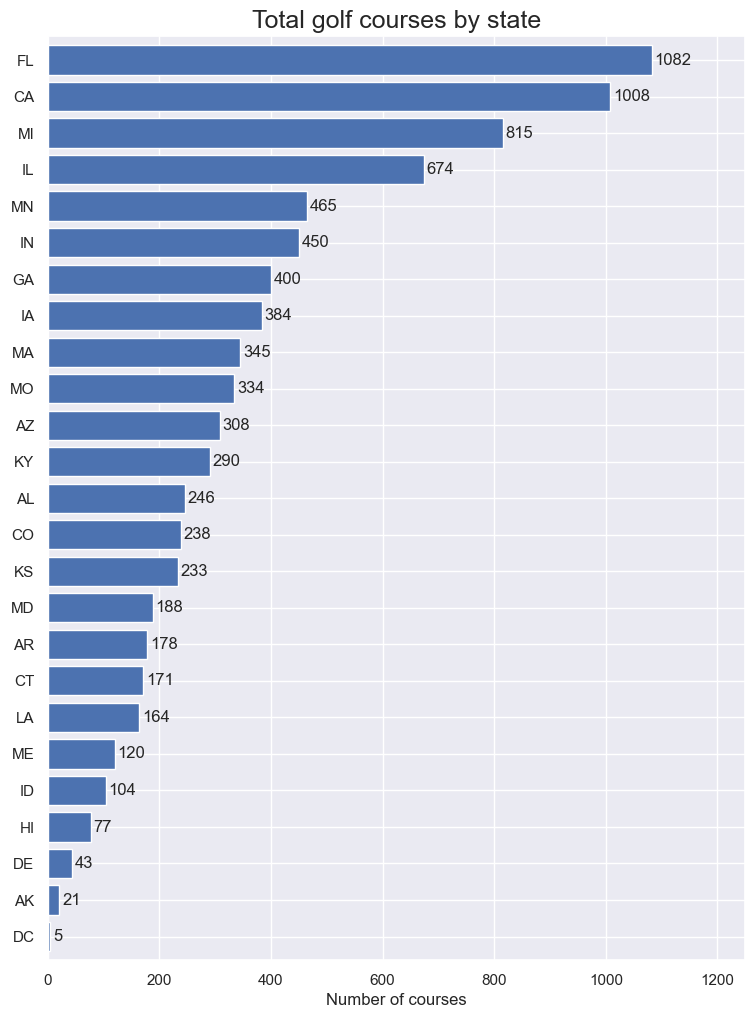

In [5]:
fig, ax = plt.subplots(1)
fig.set_size_inches(9, 2 + len(counts)* 0.4)
s = states['courses'].sort_values()
s.plot(kind='barh', ax=ax, width=0.8)
for i, ct in enumerate(s.values):
    ax.text(ct + 5, i, ct, ha='left', va='center')
ax.set_xlim(0, ax.get_xlim()[1] * 1.1)
ax.set_xlabel('Number of courses')
ax.set_ylabel('')
ax.set_title('Total golf courses by state', fontsize=18)

Text(0.5, 1.0, 'Golf courses *per million residents* by state')

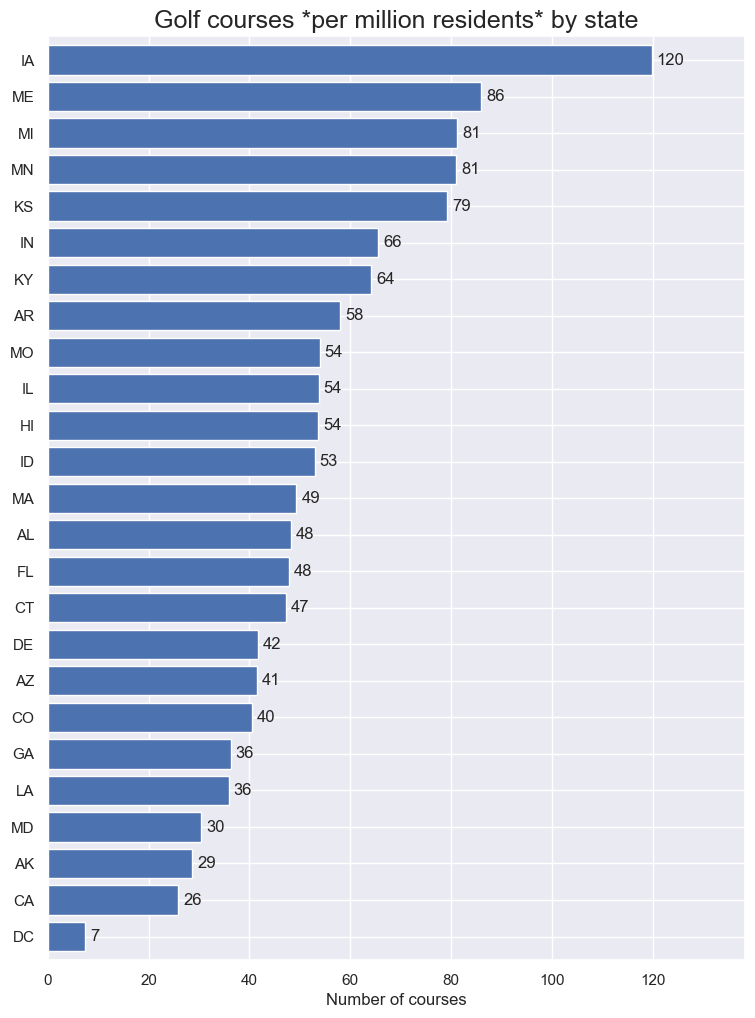

In [6]:
fig, ax = plt.subplots(1)
fig.set_size_inches(9, 2 + len(counts)* 0.4)
frame = states.sort_values(['permillion'])
frame['permillion'].plot(kind='barh', ax=ax, width=0.8)
for i, ct in enumerate(frame['permillion'].values):
    ax.text(ct + 1, i, f'{ct:.0f}', ha='left', va='center')
ax.set_xlim(0, ax.get_xlim()[1] * 1.1)
ax.set_xlabel('Number of courses')
ax.set_ylabel('')
ax.set_title('Golf courses *per million residents* by state', fontsize=18)

Text(0.5, 1.0, 'State population vs # courses')

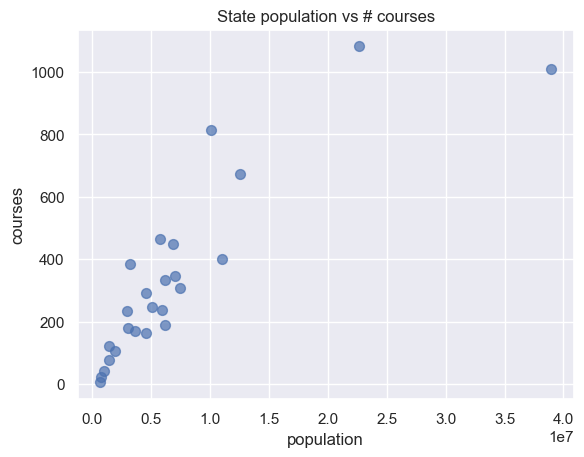

In [7]:
ax = states.plot(x='population', y='courses', kind='scatter', alpha=0.7, s=50)
ax.set_title('State population vs # courses')

Text(0.5, 1.0, 'State population vs # courses, log scale')

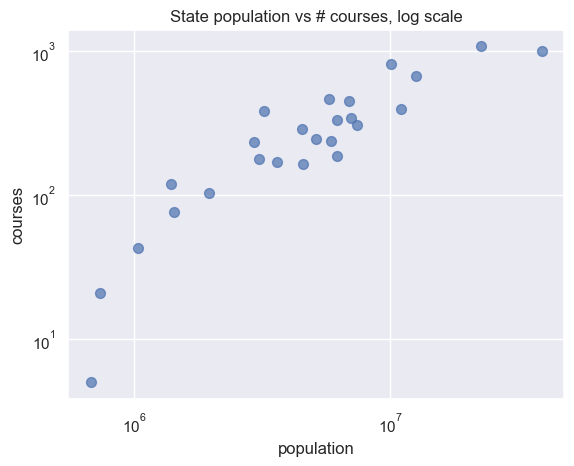

In [8]:
ax = states.plot(x='population', y='courses', kind='scatter', alpha=0.7, s=50, logx=True, logy=True)
ax.set_title('State population vs # courses, log scale')